# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association (such as correlation between numerical variables) between two categorical variables. There are more columns for feature engineering, but we will focus on the name column and filling missing values in other columns.

To illustrate the concept, we will use the "titanic" dataset. This is a well explored dataset but provides a lot of opportunities for feature engineering. Our task is predicting the survival of a passenger, but we will not build a model in this homework.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin (687/891). We can't drop records based on cabin. We will encode not having a cabin as character **O**

# Q1 (.5 points) Fill NAN in cabin with Character 'O'

In [6]:
#Write code here
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("O")
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [7]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter (C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
#Write code here
titanic_df["Cabin_type"] = titanic_df["Cabin"].str[0]

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

<Axes: xlabel='Sex', ylabel='count'>

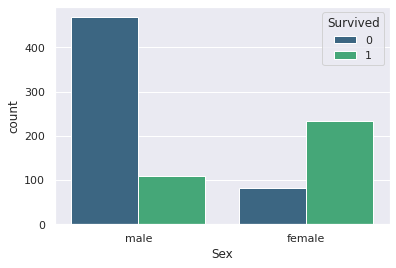

In [10]:
#Write code here
sns.countplot(x="Sex", data=titanic_df, palette="viridis", hue="Survived")

# Q4(.5) What is your observation from this plot.

We can see that most males did not survive, while most females survived

We can't use name as a feature for building any machine learning classifier (logistic regression). Let's look at Name column and see if we can think of a better feature for name.

In [11]:
titanic_df['Name'].sample(30)

219                               Harris, Mr. Walter
429               Pickard, Mr. Berk (Berk Trembisky)
428                                 Flynn, Mr. James
868                      van Melkebeke, Mr. Philemon
796                      Leader, Dr. Alice (Farnham)
402                         Jussila, Miss. Mari Aina
469                    Baclini, Miss. Helene Barbara
679               Cardeza, Mr. Thomas Drake Martinez
62                       Harris, Mr. Henry Birkhardt
244                             Attalah, Mr. Sleiman
579                              Jussila, Mr. Eiriik
305                   Allison, Master. Hudson Trevor
331                              Partner, Mr. Austen
562                       Norman, Mr. Robert Douglas
768                              Moran, Mr. Daniel J
835                      Compton, Miss. Sara Rebecca
478                        Karlsson, Mr. Nils August
886                            Montvila, Rev. Juozas
316              Kantor, Mrs. Sinai (Miriam St

# Q5.(.5 points) Can you suggest a feature based on *Name* column. 

Title of the person (mr, dr, etc)





# Q6(.5 points) Create a new feature named *Title* from the *Name* column.

Hint: Here are different titles

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different titles meant that time.

In [12]:
# Write code here
title_pattern = r"([A-Za-z]+[.])"
titanic_df["Title"] = titanic_df["Name"].str.extract(title_pattern)
titanic_df["Title"]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plots for males and for females.

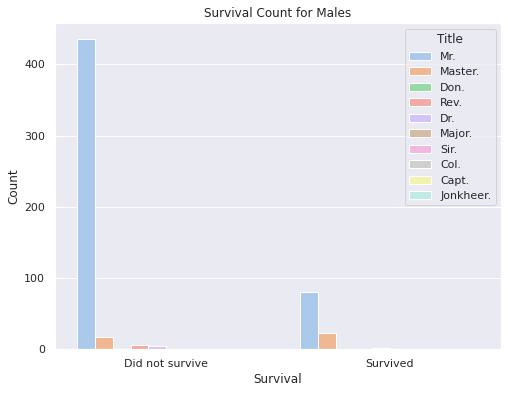

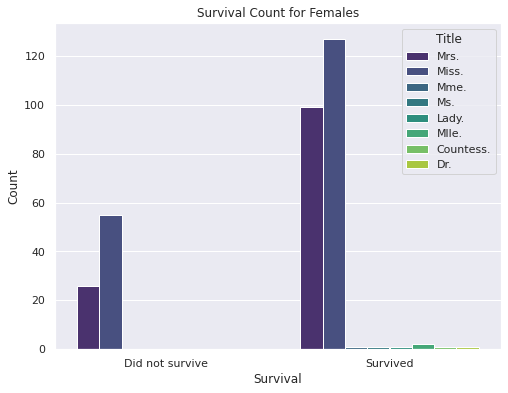

In [13]:
# Write code here
x = titanic_df.copy()
male = x[x["Sex"] == "male"].copy()
female = x[x["Sex"] == "female"].copy()
# Plot survival for males
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=male, palette='pastel', hue="Title")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Count for Males")
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.show()

# Plot survival for females
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=female, palette='viridis', hue="Title")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Count for Females")
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.show()

# Q 8(.5 points) What is your observation from these plots?

Most women survived, and most of the women who survived have the title Miss. 
Most men died, and the ones that died the most have the title "Mr"

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age NaN value by the mean for each **Title** group.

In [14]:
# Write code here
titles = titanic_df["Title"].unique().tolist()
for title in titles:
    mean = titanic_df[titanic_df["Title"] == title]["Age"].mean()
    titanic_df.loc[(titanic_df["Title"] == title) & (titanic_df["Age"].isna()), "Age"] = mean

In [15]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two records with a missing Embarked value.

In [16]:
# Let's drop these two records
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [17]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [18]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [19]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [20]:
# Write code here
titanic_clean_df = pd.get_dummies(data=titanic_clean_df, columns=["Title", "Cabin_type"])

In [21]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt.,Title_Col.,...,Title_Sir.,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.0,1,0,7.2500,S,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,0,38.0,1,0,71.2833,C,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,S,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,1,0,35.0,1,0,53.1000,S,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,3,1,35.0,0,0,8.0500,S,False,False,...,False,False,False,False,False,False,False,False,True,False


In [22]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title_Capt.           bool
Title_Col.            bool
Title_Countess.       bool
Title_Don.            bool
Title_Dr.             bool
Title_Jonkheer.       bool
Title_Lady.           bool
Title_Major.          bool
Title_Master.         bool
Title_Miss.           bool
Title_Mlle.           bool
Title_Mme.            bool
Title_Mr.             bool
Title_Mrs.            bool
Title_Ms.             bool
Title_Rev.            bool
Title_Sir.            bool
Cabin_type_A          bool
Cabin_type_B          bool
Cabin_type_C          bool
Cabin_type_D          bool
Cabin_type_E          bool
Cabin_type_F          bool
Cabin_type_G          bool
Cabin_type_O          bool
Cabin_type_T          bool
dtype: object

# Q11.(.5) Plot a heatmap of correlation using titanic_df.

In [23]:
# Write code here
# as heatmap can only be done with numeric values, we need to get rid of anything that is not numeric
x = titanic_df.copy()
print(x.info())
# As we can see, we need to get rid of Name, Ticket, Cabin, Embarked, Cabin_type, and Title
x = x.drop(["Name", "Ticket", "Cabin", "Embarked", "Cabin_type", "Title"], axis=1)
# We can also delete some columns that cannot be correlated in any way, such as passenger id, and survived, 
# which is a boolean variable
x = x.drop(["PassengerId", "Survived"], axis=1)
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_type   889 non-null    object 
 13  Title        889 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ----------

<Axes: >

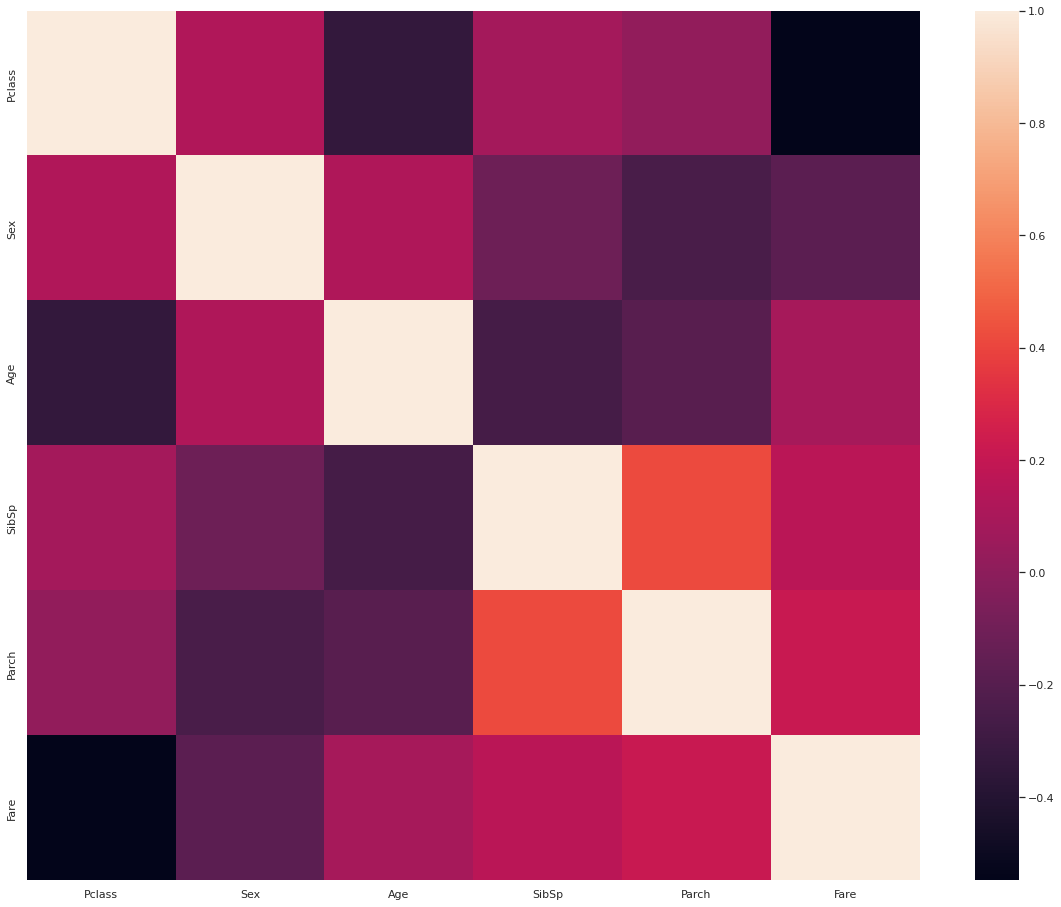

In [24]:
# Now that all columns are numeric, we can use heatmap
corr_y = pd.DataFrame(x).corr()
plt.rcParams['figure.figsize'] = (20, 16)
sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values)#, annot=True)

# Q 12.(.5) What are your observations from this heatmap.

We can see that the numerical variables are not really correlated, or their correlation is too low. 
We can see, however, that Pclass and Fare are negatively correlated, which makes sense, as the more expensive the ticket, the higher your class is, which the highest class is measured as first class, a low number, and the lowest class is 3rd class, a higher number. 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not be a linear relationship between variables (Survived vs any other attributes).

For categorical variables, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of the Pearson’s Chi-Square Test.

Let us use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let us copy and paste this here:

In [25]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let us work with  titanic dataset again.


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select records with Title value = *Master., Miss., Mr. or Mrs.*  into titanic_df_small.

You can check that other titles do not have enough records, hence we will ignore them in our analysis.

In [26]:
# Write code here
titanic_df_small = titanic_df[(titanic_df["Title"] == "Master.") | (titanic_df["Title"] == "Miss.")
                             |(titanic_df["Title"] == "Mr.") | (titanic_df["Title"] == "Mrs.")].copy()
titanic_df_small.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [27]:
# Write code here
x = titanic_df_small.copy()
conf = pd.crosstab(x["Survived"], x["Title"])
print(conf)
cramers_v(conf)

Title     Master.  Miss.  Mr.  Mrs.
Survived                           
0              17     55  436    26
1              23    126   81    98


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Q 15 (.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [28]:
# Write code here
x = titanic_df_small.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(x["Title"])
list(le.classes_)
x["Encoded_title"] = le.transform(x["Title"])
titanic_df_small["Encoded_title"] = x["Encoded_title"]
titanic_df_small.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.,2


# Q 16 (.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [29]:
# Write code here
x = titanic_df_small[["Survived", "Encoded_title"]].copy()
x.corr()

,Survived,Encoded_title
Survived,1.000000,-0.072876
Encoded_title,-0.072876,1.000000


# Q 17. (.5 points) What is your observation comparing the use of cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

Unfortunately, for now, there is no way to compare them, as the provided cramer currently does not work